<div style="margin:28px auto; padding:22px 24px; border-radius:16px; box-shadow:0 10px 24px rgba(0,0,0,.07); background:radial-gradient(120% 140% at 0% 0%, #f7fafc 0%, #ffffff 60%); text-align:center; max-width:960px;">
  <h1 style="margin:0; font-weight:800; letter-spacing:-0.02em; font-size:2.2em; color:#111827;">
    🚀 Doctra Quick Start
  </h1>
  <p style="margin:.55rem 0 0; font-size:.98em; color:#6b7280;">
    Everything you need to get started, fast
  </p>
</div>

<div align="right">
  <a href="https://colab.research.google.com/drive/1Z9UH9r1ZxGHm2cAFVKy7W9cKjcgBDOlG?usp=sharing" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="height: 22px;"/>
  </a>
</div>

<div align="center"> <img src="https://raw.githubusercontent.com/AdemBoukhris457/Doctra/main/assets/Doctra_Banner_MultiDoc.png" style="width: 100%; object-fit: cover;" alt="Doctra Banner">
</div>

This notebook demonstrates how to use **Doctra** for structured document parsing without Vision Language Models (VLM). You'll learn how to:

- Parse PDF documents with layout detection
- Extract structured content including text, tables, charts, and figures
- Generate multiple output formats (Markdown, HTML, Excel)
- Visualize document layout and detected elements

## What You'll Learn

This guide covers the core functionality of Doctra's structured parsing capabilities, focusing on:
- **Layout Detection**: Automatically identify different document elements
- **Content Extraction**: Extract text, tables, charts, and figures with proper structure
- **Multi-format Output**: Generate results in various formats for different use cases

Let's get started! 🚀


## 📦 Installation

First, let's install Doctra and its dependencies. The installation includes:

- **Core Doctra package**: Main parsing and extraction functionality
- **OCR engines**: PaddleOCR and Tesseract for text recognition
- **Document processing**: PDF2Image and Poppler utilities for PDF handling
- **Output formats**: Support for Excel, HTML, and Markdown exports
- **AI integration**: Anthropic Claude for advanced text processing

Run the following cell to install Doctra:


In [ ]:
! pip install doctra

### System Dependencies

Doctra requires some system-level dependencies for PDF processing. We need to install `poppler-utils` which provides the `pdftoppm` utility for converting PDF pages to images:


In [ ]:
! sudo apt-get install -y poppler-utils

## 🔧 Setting Up the Parser

Now let's initialize the **StructuredPDFParser**. This is the core component that handles:

- **Layout Detection**: Automatically identifies different document elements (text, tables, charts, figures)
- **Content Extraction**: Extracts text and images(tables, charts, figures) from each detected element
- **Multi-format Output**: Generates results in Markdown, HTML, and Excel formats

The parser works without Vision Language Models (VLM), making it faster and more efficient for text extraction.


In [3]:
from doctra.parsers.structured_pdf_parser import StructuredPDFParser

# use basic parser without VLM
parser = StructuredPDFParser()

## 📊 Layout Detection and Visualization

Let's explore the document's layout before parsing. The `display_pages_with_boxes()` method will:

1. **Analyze the document structure** and detect different elements
2. **Display bounding boxes** around detected elements (text, tables, charts, figures)
3. **Show a summary** of all detected elements by type

This gives you a visual understanding of how the parser will interpret your document before the actual parsing begins.


🔄 Loading PaddleOCR layout model: "PP-DocLayout_plus-L":   0%|          | 0/1 [00:00<?]


📊 Layout Detection Summary for wipo_financial_report_min.pdf:
Pages processed: 2

Total elements detected:
  - chart: 2
  - figure_title: 3
  - header: 2
  - number: 2
  - paragraph_title: 1
  - table: 2
  - text: 9


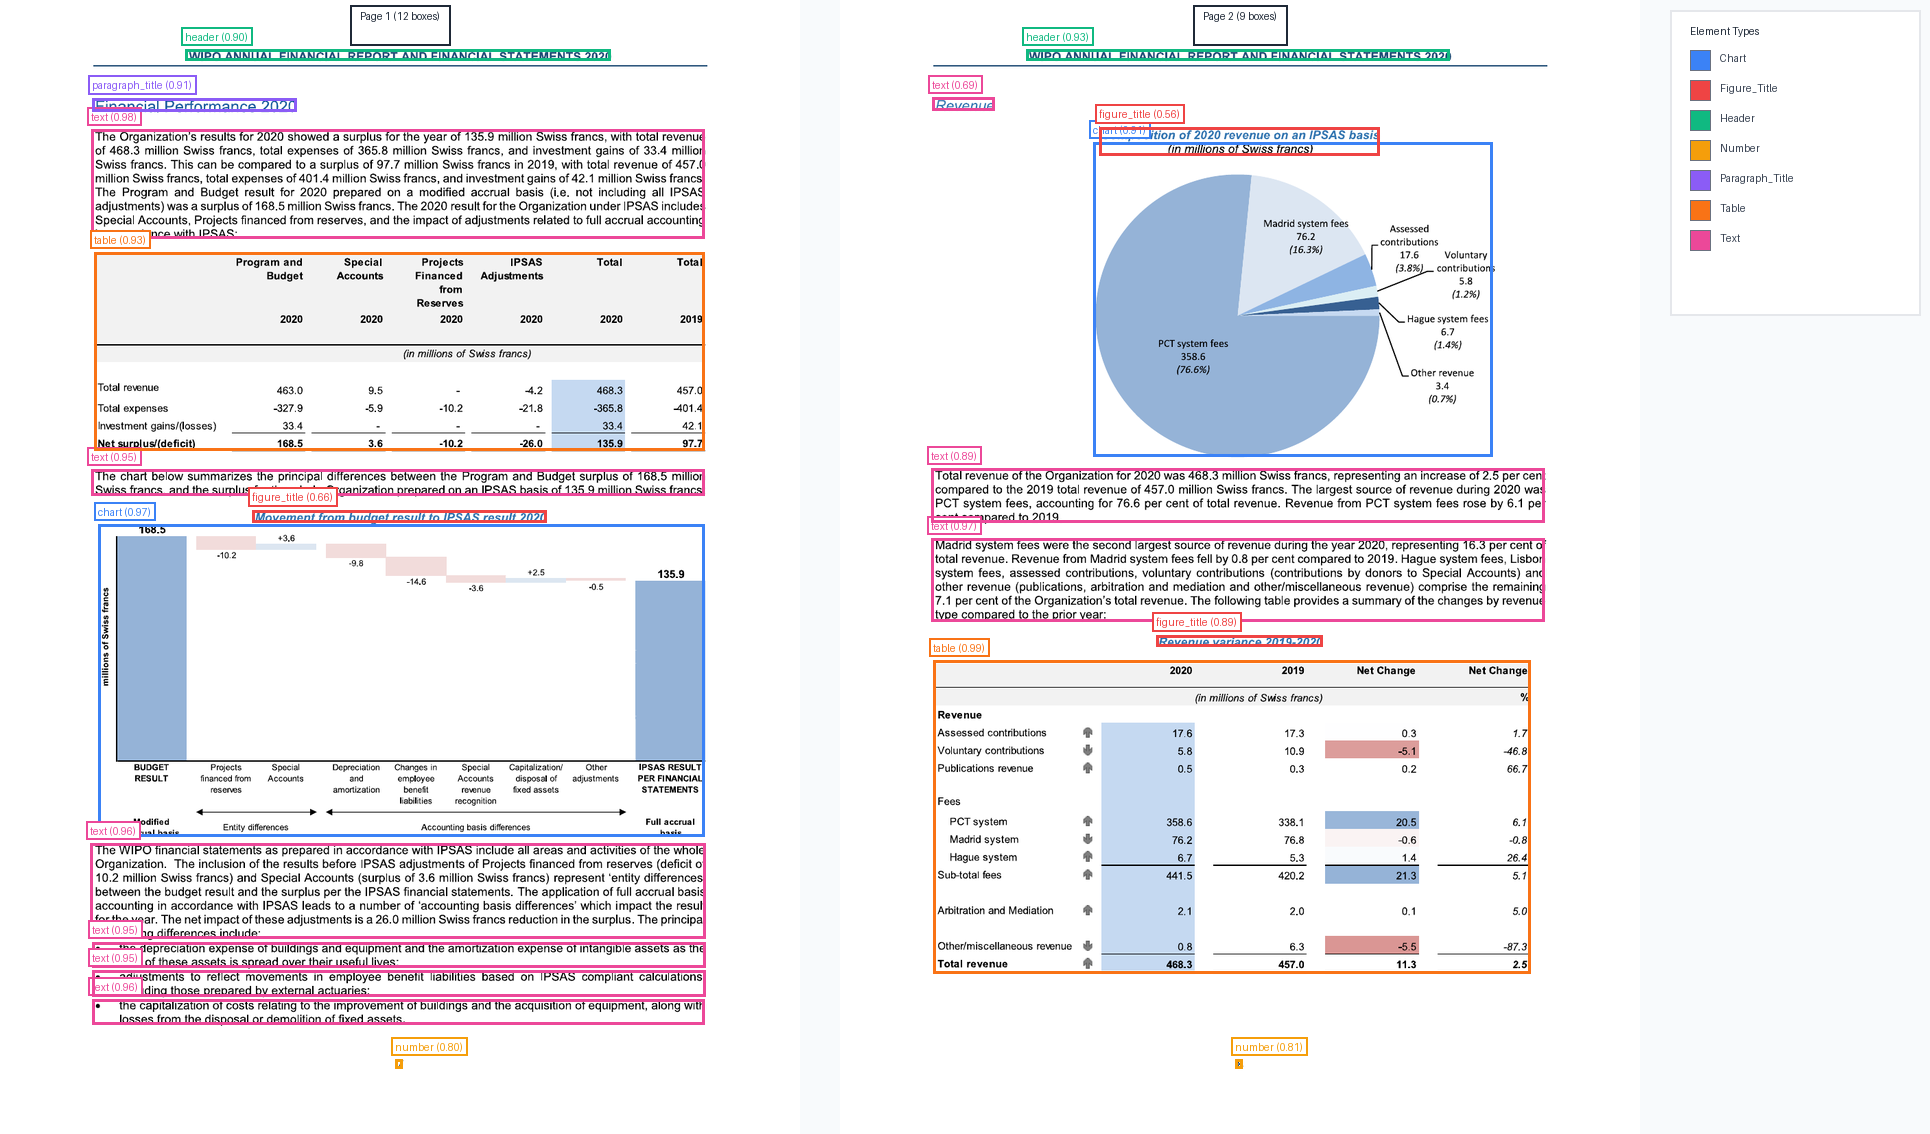

In [4]:
parser.display_pages_with_boxes(
    pdf_path="/content/wipo_financial_report_min.pdf",
    num_pages=2
)

## 🔄 Document Parsing

Now let's parse the document! The `parse()` method will:

1. **Process each page** of the PDF document
2. **Extract content** from all detected elements (text, tables, charts, figures)
3. **Generate structured output** in multiple formats
4. **Save results** to the output directory

The parsing process includes:
- **Text extraction** with proper formatting
- **Table detection and extraction** with structure preservation
- **Chart and figure identification** with metadata
- **Layout-aware content ordering** to maintain document flow


In [5]:
# parse document
parser.parse("/content/wipo_financial_report_min.pdf")

📊 Charts (cropped):   0%|          | 0/2 [00:00<?]

📋 Tables (cropped):   0%|          | 0/2 [00:00<?]

✅ Parsing completed successfully!
📁 Output directory: outputs/wipo_financial_report_min/full_parse


### 📁 Output Directory Structure

Let's explore the generated output files. The parser creates a structured directory with:

- **`result.md`**: Markdown format with formatted text and tables
- **`result.html`**: HTML format with styling and layout preservation
- **`result.xlsx`**: Excel format with separate sheets for different content types
- **Images**: Extracted charts, figures, and visual elements


In [6]:
from rich.tree import Tree
from rich import print
from pathlib import Path

def show_tree(directory, tree=None):
    dir_path = Path(directory)
    if tree is None:
        tree = Tree(f"📁 [bold blue]{dir_path.name}[/bold blue]")
    for path in sorted(dir_path.iterdir(), key=lambda x: (not x.is_dir(), x.name)):
        if path.is_dir():
            branch = tree.add(f"📁 [cyan]{path.name}[/cyan]")
            show_tree(path, branch)
        else:
            tree.add(f"📄 [green]{path.name}[/green]")

    return tree

In [7]:
print(show_tree("/content/outputs"))

📁 outputs
└── 📁 wipo_financial_report_min
    └── 📁 full_parse
        ├── 📁 images
        │   ├── 📁 charts
        │   │   ├── 📄 page_001_chart_007.jpg
        │   │   └── 📄 page_002_chart_004.jpg
        │   ├── 📁 figures
        │   └── 📁 tables
        │       ├── 📄 page_001_table_004.jpg
        │       └── 📄 page_002_table_008.jpg
        ├── 📄 result.html
        └── 📄 result.md

## 📄 Viewing the Results

Now let's examine the different output formats generated by the parser. Each format serves different purposes:

### 📝 Markdown Output
The Markdown format provides clean, readable text with:
- **Structured headings** and paragraphs
- **Image references** for tables, charts and figures

In [8]:
def show_markdown(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        md_content = f.read()
    print(md_content)

show_markdown('/content/outputs/wipo_financial_report_min/full_parse/result.md')

# Extracted Content

## Page 1

WIPO ANNUAL FINANCIAL REPORT AND FINANCIAL STATEMENTS 2020

Financial Performance 2020

The Organization’s results for 2020 showed a surplus for the year of 135.9 million Swiss francs, with total revenue
of 468.3 million Swiss francs, total expenses of 365.8 million Swiss francs, and investment gains of 33.4 million
Swiss francs. This can be compared to a surplus of 97.7 million Swiss francs in 2019, with total revenue of 457.0
million Swiss francs, total expenses of 401.4 million Swiss francs, and investment gains of 42.1 million Swiss 
francs.
The Program and Budget result for 2020 prepared on a modified accrual basis (i.e. not including all IPSAS
adjustments) was a surplus of 168.5 million Swiss francs. The 2020 result for the Organization under IPSAS includes
Special Accounts, Projects financed from reserves, and the impact of adjustments related to full accrual accounting
in accordance with IPSAS:

![Table — page 1](images/tables/page_001_table_004.jpg)

The chart below summarizes the principal differences between the Program and Budget surplus of 168.5 million
Swiss francs. and the surplus for the whole Organization prepared on an IPSAS basis of 135.9 million Swiss francs:

Movement from budaet result to IPSAS result 2020

![Chart — page 1](images/charts/page_001_chart_007.jpg)

The WIPO financial statements as prepared in accordance with IPSAS include all areas and activities of the whole
Organization. The inclusion of the results before IPSAS adjustments of Projects financed from reserves (deficit of
10.2 million Swiss francs) and Special Accounts (surplus of 3.6 million Swiss francs) represent ‘entity 
differences’
between the budget result and the surplus per the IPSAS financial statements. The application of full accrual basis
accounting in accordance with IPSAS leads to a number of ‘accounting basis differences’ which impact the result
for the year. The net impact of these adjustments is a 26.0 million Swiss francs reduction in the surplus. The 
principal
accounting differences include:

* _ the depreciation expense of buildings and equipment and the amortization expense of intangible assets as the
cost of these assets is spread over their useful lives:

* adjustments to reflect movements in employee benefit liabilities based on IPSAS compliant calculations,
includina those prepared by external actuaries:

* _ the capitalization of costs relating to the improvement of buildings and the acquisition of equipment, along 
with
losses from the disposal or demolition of fixed assets.

## Page 2

WIPO ANNUAL FINANCIAL REPORT AND FINANCIAL STATEMENTS 2020

Revenue

Composition of 2020 revenue on an IPSAS basis
(in millions of Swiss francs)

![Chart — page 2](images/charts/page_002_chart_004.jpg)

Total revenue of the Organization for 2020 was 468.3 million Swiss francs, representing an increase of 2.5 per cent
compared to the 2019 total revenue of 457.0 million Swiss francs. The largest source of revenue during 2020 was
PCT system fees, accounting for 76.6 per cent of total revenue. Revenue from PCT system fees rose by 6.1 per
cent compared to 2019.

Madrid system fees were the second largest source of revenue during the year 2020, representing 16.3 per cent ot
total revenue. Revenue from Madrid system fees fell by 0.8 per cent compared to 2019. Hague system fees, Lisbor
system fees, assessed contributions, voluntary contributions (contributions by donors to Special Accounts) and
other revenue (publications, arbitration and mediation and other/miscellaneous revenue) comprise the remaining
7.1 per cent of the Organization's total revenue. The following table provides a summary of the changes by revenue
type compared to the prior ye:

Revenue variance 2019-2020

![Table — page 2](images/tables/page_002_table_008.jpg)

### 🌐 HTML Output
The HTML format preserves the original document's visual structure with:
- **Interactive elements** and proper formatting
- **Embedded images** and visual elements
- **Web-ready format** for sharing and presentation

In [9]:
from IPython.display import HTML, display

def show_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        html_content = f.read()
    display(HTML(html_content))

In [ ]:
show_html('/content/outputs/wipo_financial_report_min/full_parse/result.html')

## 🎉 Summary

Congratulations! You've successfully learned how to use Doctra for structured document parsing. Here's what we accomplished:

### ✅ What We Learned
- **Setup**: Installed Doctra and system dependencies
- **Parser Configuration**: Initialized the StructuredPDFParser
- **Layout Detection**: Visualized document structure and element detection
- **Document Parsing**: Extracted structured content from PDF documents
- **Output Generation**: Created multiple output formats (Markdown, HTML)

### 🚀 Next Steps
- **Try different documents**: Test with various PDF types (reports, forms, academic papers)
- **Customize parsing**: Explore parser parameters for different document types
- **Advanced features**: Learn about VLM integration for enhanced text understanding
- **Integration**: Use the extracted data in your applications and workflows

### 📚 Additional Resources
- Check out the [Doctra documentation](https://github.com/AdemBoukhris457/Doctra) for advanced features

Happy parsing! 🎯